## Health Insurance Dataset analysis and Prediction

#####  The Situation

You have just been hired as a data scientist for Danny's Insurance Company. A large  private health insurance provider in Nigeria.

#####  The Assignment

* The company is looking at updating their insurance pricing model and want you to start a new one from scratch with a handfullof variables.
* If you are successful, they can reduce the complexity of their model while maintaining its accuracy.
* NOTE: The data has already been cleaned/wrangled.

##### The Objectives

1. Identify the strongest predictor of insurance prices using correlation
2. Build a simple linear regression model using this feature
3. Predict insurance prices for new customers using the model.

######  Importation of dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###### Importing dataset

In [2]:
df = pd.read_csv(r"insurance (2).csv")

In [3]:
#View head
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#view tail
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


###### shape

In [5]:
df.shape

(1338, 7)

######  Dataset Information

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


###### Exploratory  Data Analysis (EDA)

###### Univariate analysis

C:\Users\JAMES TECH\Documents\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Count'>

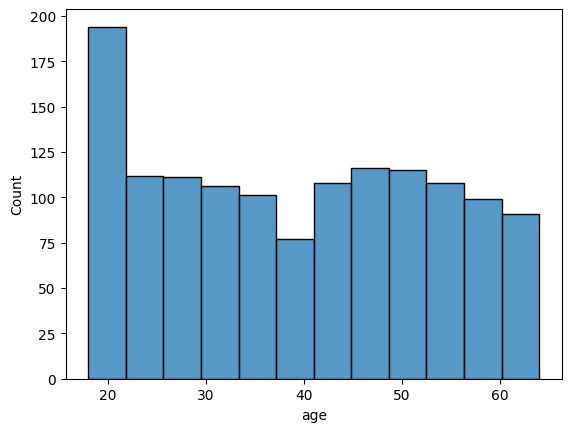

In [7]:
sns.histplot(df['age'])

In [8]:
#sex

df['sex'].nunique()

2

In [9]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [10]:
sex_counts = df['sex'].value_counts().to_frame()
sex_counts

,count
sex,
male,676
female,662


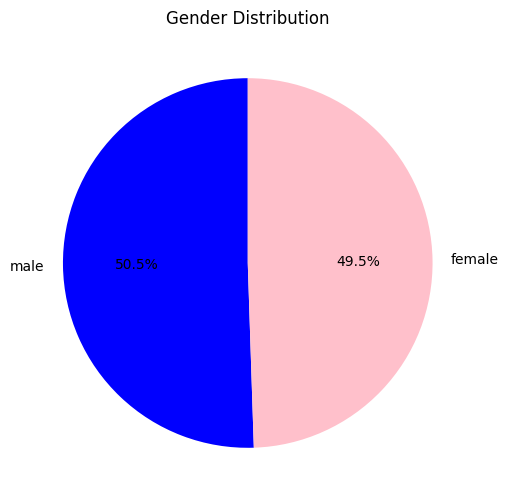

In [11]:
#plot
sex_counts = df['sex'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', colors=['blue', 'pink'], startangle=90)
plt.title("Gender Distribution")
plt.show()

###### Key Observation:
* They are more males (676,50.5%) than females (662, 49.5%) in the dataset.

In [12]:
#Smoker
df['smoker'].nunique()


2

In [13]:
smoker_count = df['smoker'].value_counts()
print(smoker_count)

smoker
no     1064
yes     274
Name: count, dtype: int64


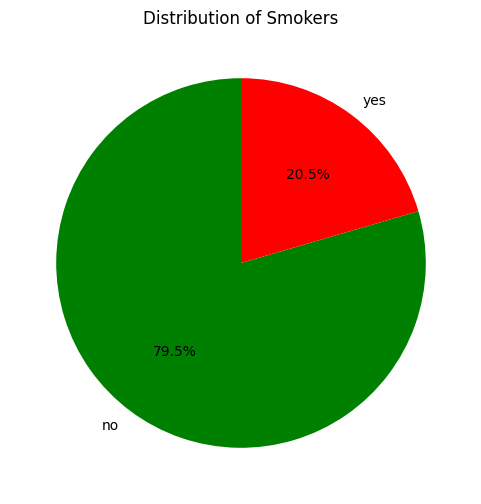

In [14]:
#pie plot
plt.figure(figsize=(6, 6))
plt.pie(smoker_count, labels=smoker_count.index, autopct='%1.1f%%', colors=['green', 'red'], startangle=90)
plt.title("Distribution of Smokers")
plt.show()

######  Key Insight:
* They are more non smokers (1060, 79.5%) than smokers (274, 20.5%)

In [15]:
#Region
df['region'].nunique()

4

In [16]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [17]:
region_counts = df['region'].value_counts(ascending = False).to_frame()
region_counts

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


<Figure size 1000x500 with 0 Axes>

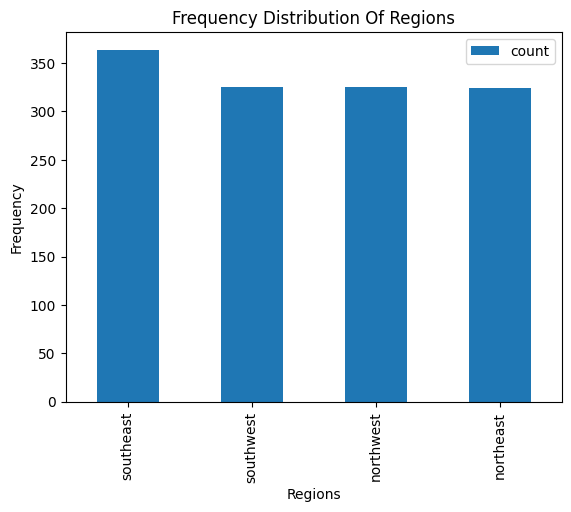

In [18]:
#Bar plot
plt.figure(figsize=(10,5))
region_count = df['region'].value_counts(ascending = False)
region_counts.plot(kind = 'bar')
plt.title("Frequency Distribution Of Regions")
plt.xlabel("Regions")
plt.ylabel("Frequency")
plt.show()

###### Key Insight:
* Southeast has the highest frequency, both southwest and northwest has the same frequency whereas northeast has the least frequency distribution.

###### Bivariate Analysis

In [19]:
#region and charges
sex_age = df.groupby('region')['charges'].mean().to_frame()
sex_age

,charges
region,
northeast,13406.384516
northwest,12417.575374
southeast,14735.411438
southwest,12346.937377


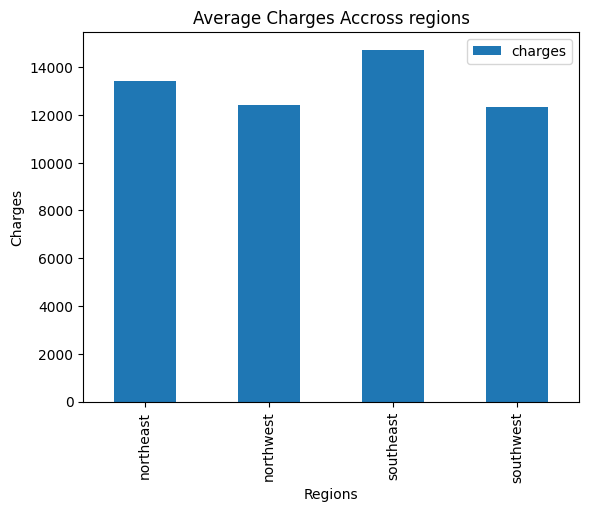

In [20]:
sex_age.plot(kind = 'bar')
plt.title("Average Charges Accross regions")
plt.ylabel("Charges")
plt.xlabel("Regions")
plt.show()

###### Key Insight:
Southeast has the highest avergae charges while southwest has the least.

In [21]:
#charges by sex/gender

sex_charges = df.groupby('sex')['charges'].mean().round()
sex_charges

sex
female    12570.0
male      13957.0
Name: charges, dtype: float64

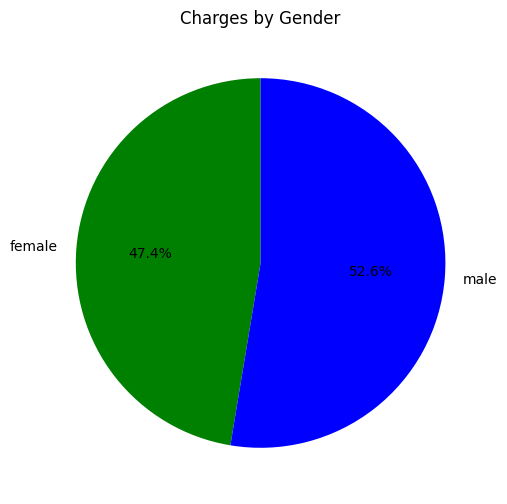

In [22]:
plt.figure(figsize=(6, 6))
plt.pie(sex_charges, labels=sex_charges.index, autopct='%1.1f%%', colors=['green', 'blue'], startangle=90)
plt.title("Charges by Gender")
plt.show()

###### Key Insight:
The male gender has the highest charges (13957.0, 52.6%)

In [23]:
#charges by smokers
smo_charge = df.groupby('smoker')['charges'].mean().round()
smo_charge

smoker
no      8434.0
yes    32050.0
Name: charges, dtype: float64

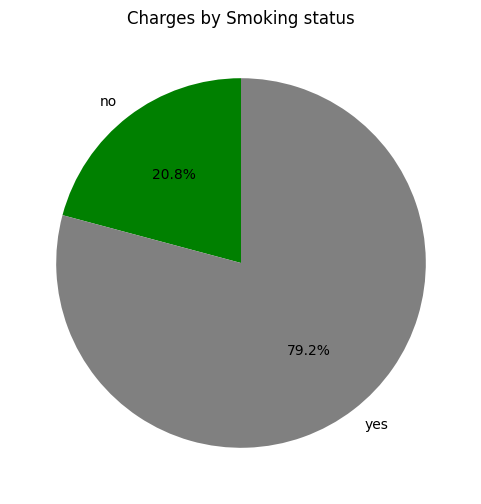

In [24]:
plt.figure(figsize=(6, 6))
plt.pie(smo_charge, labels=smo_charge.index, autopct='%1.1f%%', colors=['green', 'grey'], startangle=90)
plt.title("Charges by Smoking status")
plt.show()

###### Key Insight:
Non smokers have a very high charges (79.2%) compare to smokers.

###### Exploring the target variable (Charges)

C:\Users\JAMES TECH\Documents\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='charges', ylabel='Count'>

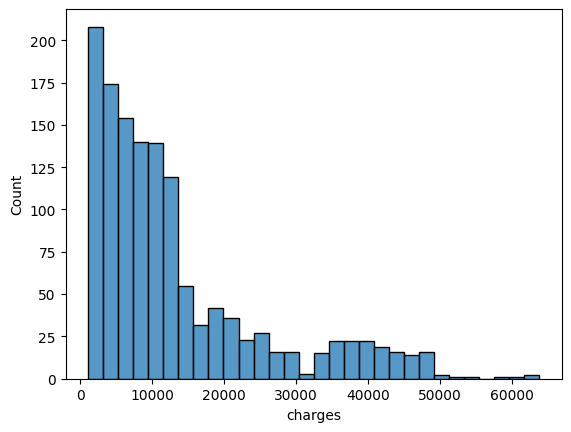

In [25]:
sns.histplot(df['charges'])

######  Objective 1.
* Identify the strongest using correlation.

* NOTE: Since I am to identify the strongest predictor using correlation, then I will use only numerical columns.

In [26]:
num_corr = df.corr(numeric_only = True)
num_corr

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


###### Note:

Age has the highest correlation amongst other numerical columns.

###### Objective 2: Model Building

In [27]:
#Using statsmodel
import statsmodels.api as sm

In [28]:
X = sm.add_constant(df['age'])
Y = df['charges']
model = sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     131.2
Date:                Thu, 03 Apr 2025   Prob (F-statistic):           4.89e-29
Time:                        20:13:50   Log-Likelihood:                -14415.
No. Observations:                1338   AIC:                         2.883e+04
Df Residuals:                    1336   BIC:                         2.884e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3165.8850    937.149      3.378      0.001    1327.440    5004.330
age          257.7226     22.502     11.453      0.000     213.579     301.866
==============================================================================
Omnibus:                      399.600   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              864.239
Skew:                           1.733   Prob(JB):                    2.15e-188
Kurtosis:                       4.869   Cond. No.                         124.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
#Making Predictions
age = 30 
exog = np.array([[1, age]])

prediction = model.predict(exog)[0].round()
print("Predicted Charges:", prediction)

Predicted Charges: 10898.0


In [35]:
#Make predictions
prediction = model.predict(X_predict)
prediction.name = "predictions"

In [38]:
#save the model
import streamlit as st
import joblib

In [39]:
joblib.dump(model, "age_charges_model.pkl")
print("model saved successfully!!!")

model saved successfully!!!
